In [8]:
from pycaret.datasets import get_data
from pycaret.classification import *

OSError: dlopen(/Users/jens/.local/share/virtualenvs/python-PnR407xN/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/jens/.local/share/virtualenvs/python-PnR407xN/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so
  Reason: image not found

In [ ]:
data = get_data('index')

## Classification model

In [ ]:
satellites_data = get_data('satellite')

In [4]:
satellites_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Attribute1   6435 non-null   int64
 1   Attribute2   6435 non-null   int64
 2   Attribute3   6435 non-null   int64
 3   Attribute4   6435 non-null   int64
 4   Attribute5   6435 non-null   int64
 5   Attribute6   6435 non-null   int64
 6   Attribute7   6435 non-null   int64
 7   Attribute8   6435 non-null   int64
 8   Attribute9   6435 non-null   int64
 9   Attribute10  6435 non-null   int64
 10  Attribute11  6435 non-null   int64
 11  Attribute12  6435 non-null   int64
 12  Attribute13  6435 non-null   int64
 13  Attribute14  6435 non-null   int64
 14  Attribute15  6435 non-null   int64
 15  Attribute16  6435 non-null   int64
 16  Attribute17  6435 non-null   int64
 17  Attribute18  6435 non-null   int64
 18  Attribute19  6435 non-null   int64
 19  Attribute20  6435 non-null   int64
 20  Attribut

## Model setup

In [7]:
class_model = setup(data= satellites_data, target= 'Class', numeric_features=['Attribute1'])

NameError: name 'setup' is not defined

In [6]:
compare_models()

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4688, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [7]:
lr_model_satellites = create_model('lr')

In [8]:
tuned_lr_model_satellites = tune_model(lr_model_satellites)

## Learning curve

In [9]:
plot_model(estimator = tuned_lr_model_satellites, plot= 'learning')

## AUC Curve

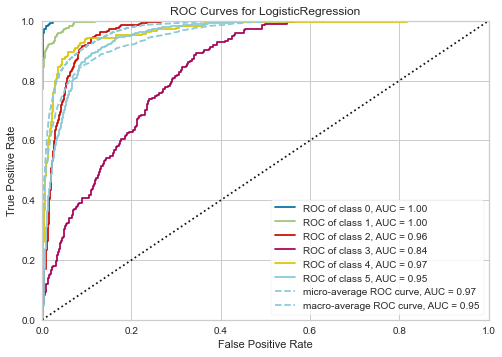

In [10]:
plot_model(estimator = tuned_lr_model_satellites, plot= "auc")

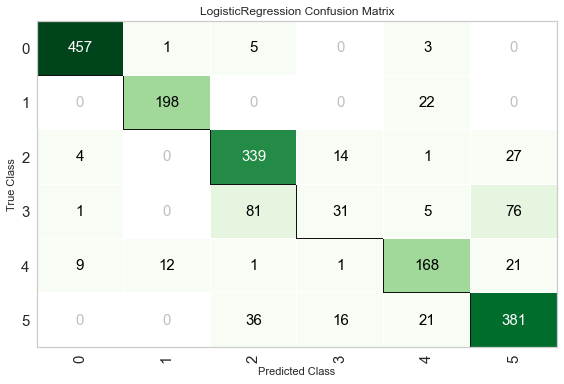

In [11]:
plot_model(estimator = tuned_lr_model_satellites, plot= "confusion_matrix")

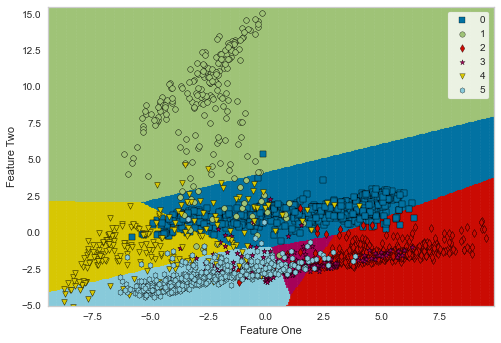

In [12]:
plot_model(estimator=tuned_lr_model_satellites, plot = 'boundary')

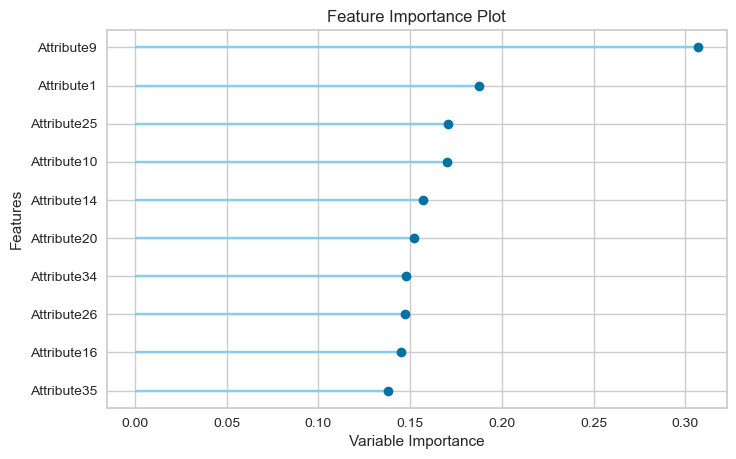

In [13]:
plot_model(estimator = tuned_lr_model_satellites, plot= 'feature')

In [14]:
evaluate_model(tuned_lr_model_satellites)

Parameters
C                      4.533
class_weight              {}
dual                   False
fit_intercept           True
intercept_scaling          1
l1_ratio                None
max_iter                1000
multi_class             auto
n_jobs                  None
penalty                   l2
random_state            4688
solver                 lbfgs
tol                   0.0001
verbose                    0
warm_start             False

In [15]:
predict_model(tuned_lr_model_satellites, data= satellites_data)

Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0             80         102         102          79          76         102   
1             76         102         102          79          76         102   
2             80          98         106          79          76          94   
3             76          94         102          76          76          94   
4             76          94         102          76          76          94   
...          ...         ...         ...         ...         ...         ...   
6430          56          64         108          96          64          71   
6431          64          71         108          96          68          75   
6432          68          75         108          96          71          87   
6433          71          87         108          88          71          91   
6434          71          91         100          81          76          95   

      Attribute7  Attribute8  Attribute9  Attribute10  ...  Attribute30  \
0            102          79          76          102  ...          107   
1            106          83          76          102  ...          107   
2            102          76          76           94  ...           95   
3            102          76          76           94  ...           95   
4            102          76          76           89  ...           95   
...          ...         ...         ...          ...  ...          ...   
6430         108          96          68           75  ...           83   
6431         108          96          71           87  ...           87   
6432         108          88          71           91  ...           87   
6433         100          81          76           95  ...          100   
6434         108          88          80           95  ...           91   

      Attribute31  Attribute32  Attribute33  Attribute34  Attribute35  \
0             109           87           79          107          113   
1             113           87           79          103          104   
2             100           79           79           95           96   
3              96           75           79           95          100   
4             100           75           75           95          100   
...           ...          ...          ...          ...          ...   
6430          108           96           66           87          104   
6431          104           89           63           87          104   
6432          104           89           70          100          104   
6433          104           85           70           91          104   
6434          104           85           63           91          100   

      Attribute36  Class  Label   Score  
0              87      3      3  0.9506  
1              83      3      3  0.9466  
2              75      4      3  0.7652  
3              75      4      3  0.6620  
4              79      4      3  0.4698  
...           ...    ...    ...     ...  
6430           89      5      5  0.7886  
6431           89      5      1  0.5305  
6432           85      4      1  0.6468  
6433           85      4      3  0.8253  
6434           81      4      1  0.5590  

[6435 rows x 39 columns]

# Regression model

In [16]:
traffic_data = get_data('traffic')

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  Rush Hour  \
0    None  288.28      0.0      0.0          40       Clouds          1   
1    None  289.36      0.0      0.0          75       Clouds          0   
2    None  289.58      0.0      0.0          90       Clouds          0   
3    None  290.13      0.0      0.0          90       Clouds          0   
4    None  291.14      0.0      0.0          75       Clouds          0   

   traffic_volume  
0            5545  
1            4516  
2            4767  
3            5026  
4            4918

In [17]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         48204 non-null  object 
 1   temp            48204 non-null  float64
 2   rain_1h         48204 non-null  float64
 3   snow_1h         48204 non-null  float64
 4   clouds_all      48204 non-null  int64  
 5   weather_main    48204 non-null  object 
 6   Rush Hour       48204 non-null  int64  
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.9+ MB


In [18]:
reg_model_traffic = setup(data= traffic_data, target='traffic_volume')

In [ ]:
compare_models()